# FAKE CURRENCY DETECTION

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
link='https://raw.githubusercontent.com/amankharwal/Website-data/master/data_banknote_authentication.txt'
data=pd.read_csv(link, names=['var','asy','kurt','ent','auth'])

### The data contains the following columns:
1. var = The variance of the image transformed into wavelets
2. asy = The asymmetry of the image transformed into wavelets
3. kurt = Kurtosis of the image transformed into wavelets
4. ent = Image entropy
5. auth = Authenticy (0 represents authetic, 1 represents fake)

## Exploratory data analysis

In [ ]:
data.head()

,var,asy,kurt,ent,auth
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
data.describe()

,var,asy,kurt,ent,auth
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
data.shape

(1372, 5)

In [ ]:
column=data.columns
column

Index(['var', 'asy', 'kurt', 'ent', 'auth'], dtype='object')

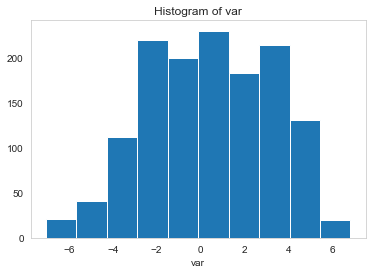

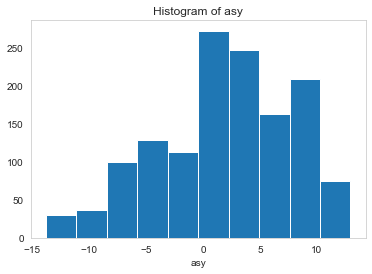

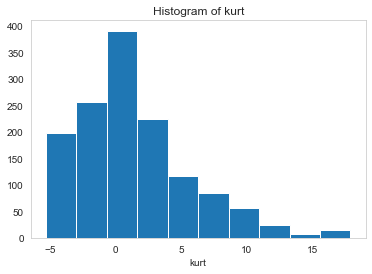

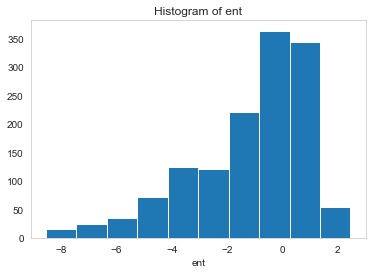

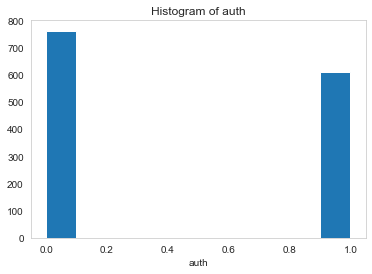

In [ ]:
#Defining a function to plot the histogram for all the columns
def plot_hist(column):
    for col in column:
        plt.hist(data[col])
        plt.xlabel(col)
        plt.title(f'Histogram of {col}')
        plt.grid()
        plt.show()
plot_hist(column)

In [ ]:
features=['var', 'asy', 'kurt', 'ent']

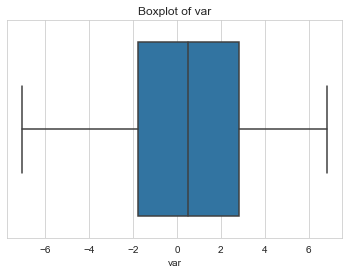

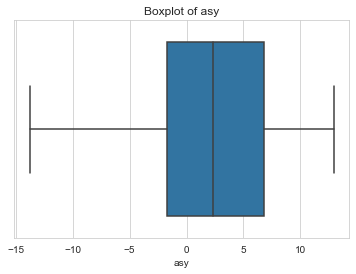

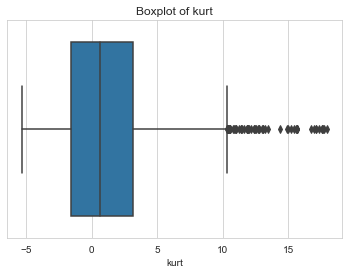

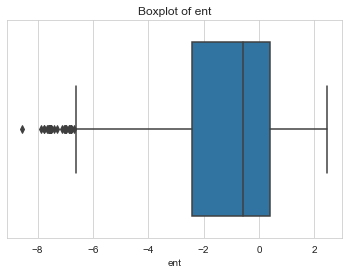

In [ ]:
def box_plot(features):
    for col in features:
        sns.boxplot(x= col, data=data)
        plt.title(f'Boxplot of {col}')
        #plt.grid()
        plt.show()
box_plot(features)

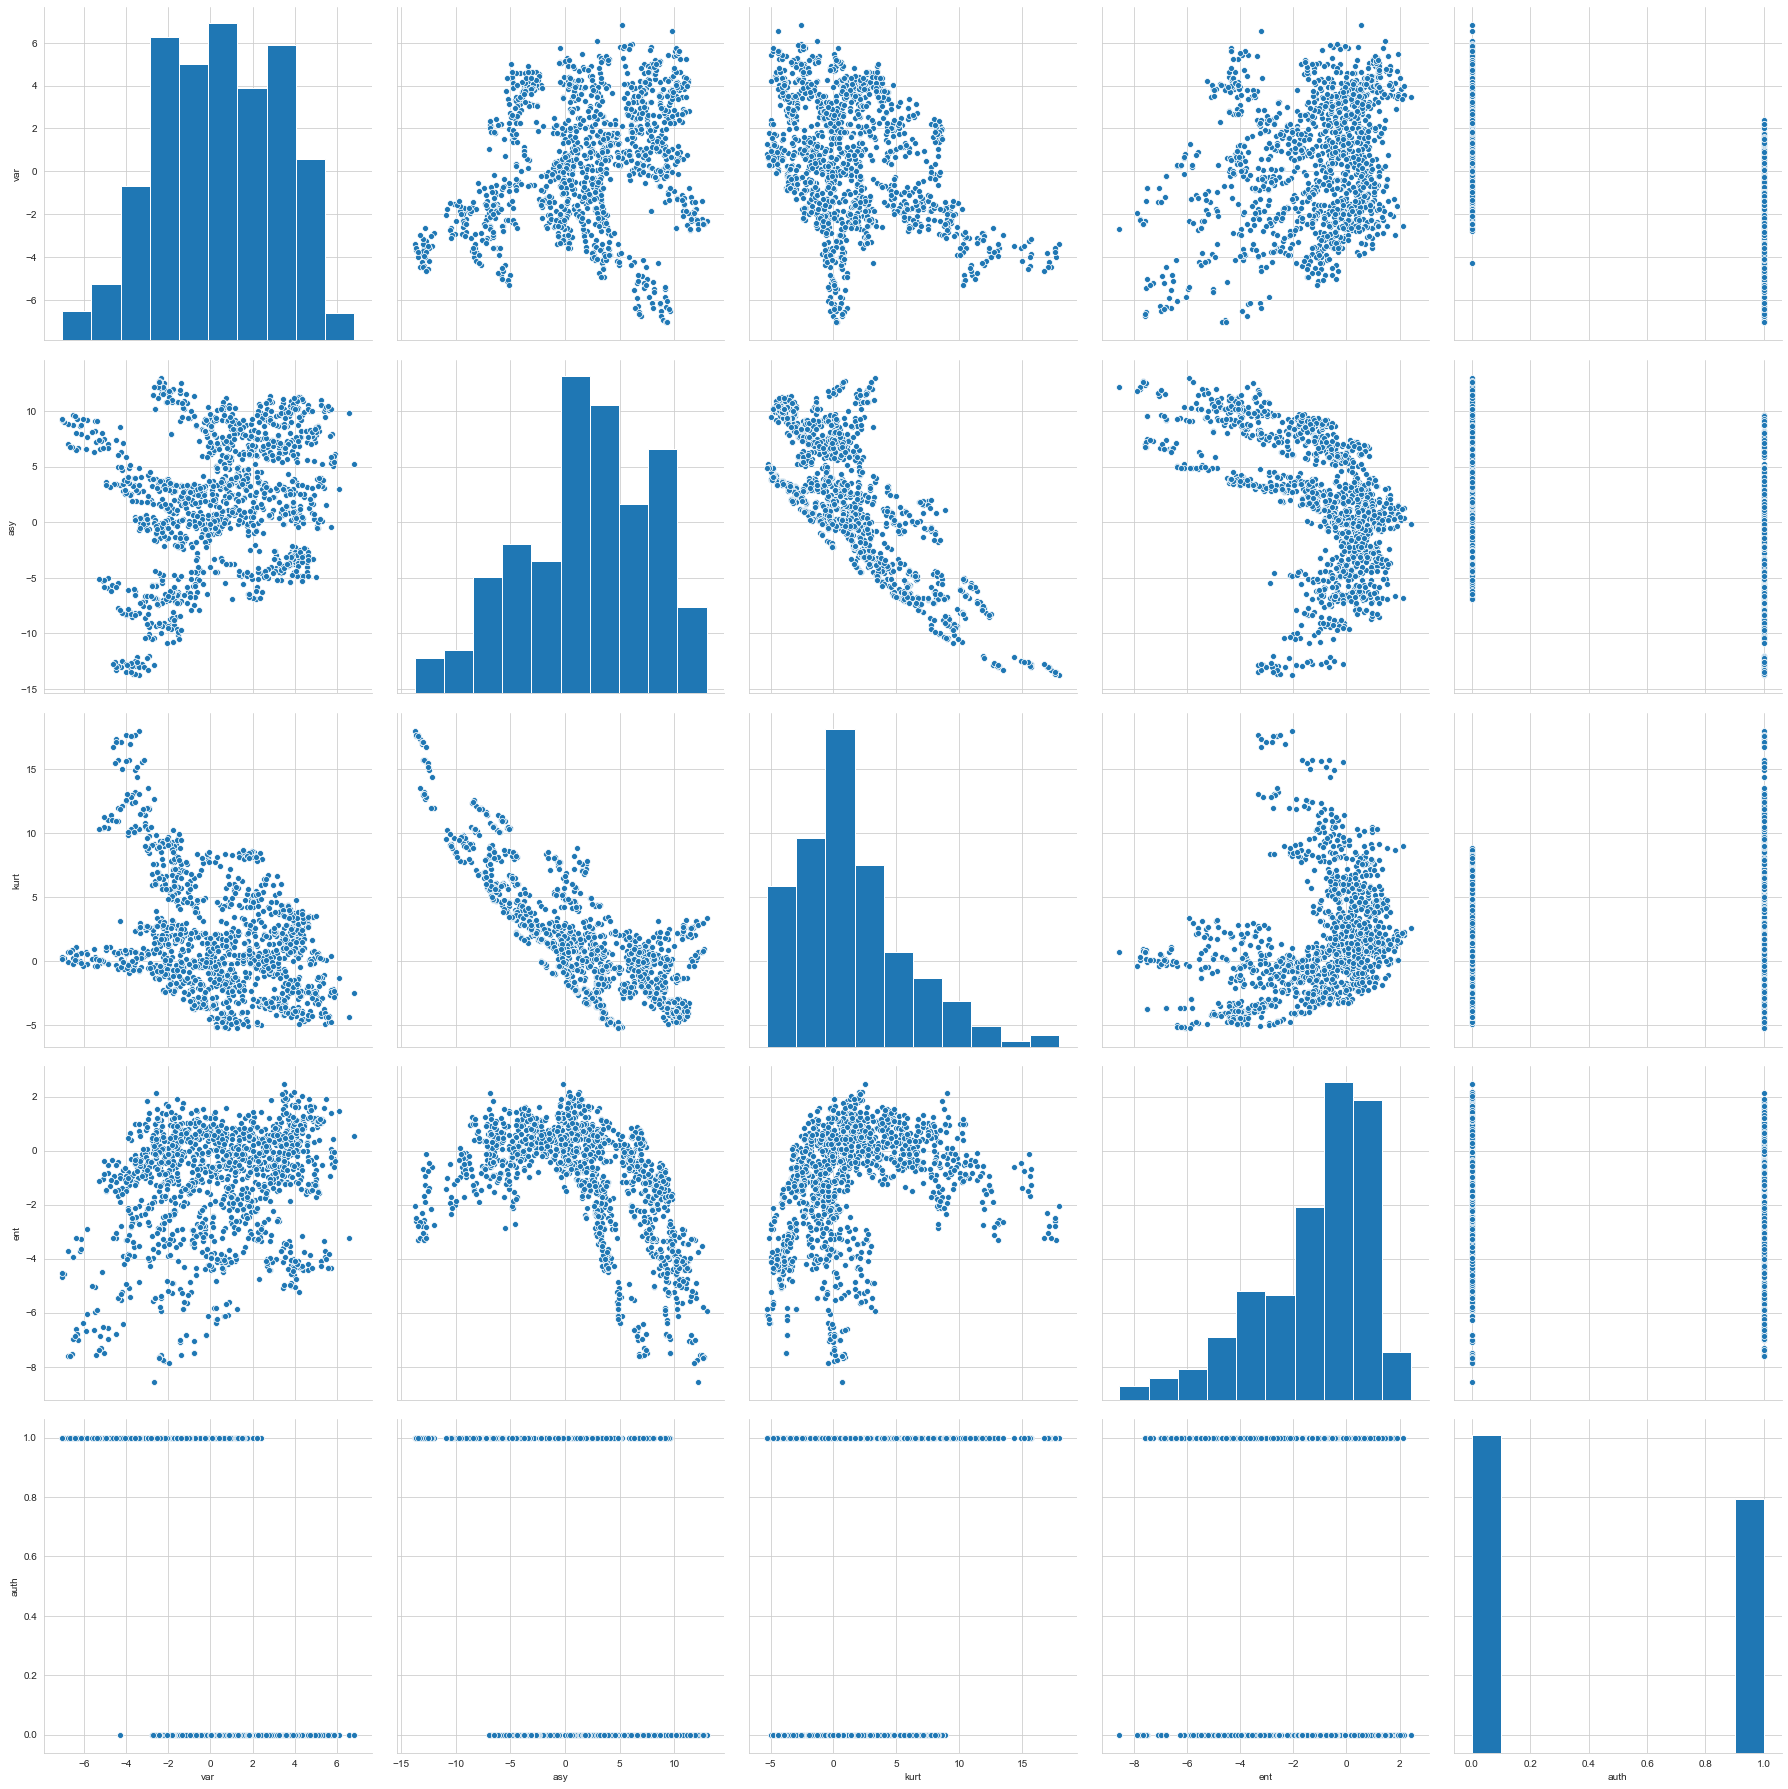

In [ ]:
# seabon pairplot to show relationship among features inluding target
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data, height=5)
plt.show()

In [ ]:
data.isnull().sum()

var     0
asy     0
kurt    0
ent     0
auth    0
dtype: int64

In [ ]:
print (data['auth'].value_counts() )

0    762
1    610
Name: auth, dtype: int64


## Building the model

In [ ]:
# defining dataset
full_data=data.copy()
X=full_data[features]
y=full_data['auth']


In [ ]:
# splitting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=32)

In [ ]:
print(x_train.shape,x_test.shape)

(1029, 4) (343, 4)


In [ ]:
#specify model
model=RandomForestClassifier( 
    n_estimators=100,
    criterion='gini',
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1, random_state=42)

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])

In [ ]:
X_train.mean()   #check the mean of scaled data

-9.494618675122816e-18

In [ ]:
X_train

array([[ 1.17134536,  0.14907929, -0.17370868,  0.72003342],
       [-1.48730217, -2.54623683,  3.44036178, -0.05928313],
       [-0.18036025, -0.46463093,  1.53364807,  0.86410318],
       ...,
       [-0.0683148 , -0.45210704, -0.1217588 ,  0.69829809],
       [-0.52154369, -0.38590442, -0.02446344,  0.75418756],
       [-1.06802677,  1.42123433, -0.65302526, -2.07131336]])

In [ ]:
pipeline.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, n_jobs=-1,
                                        random_state=42))])

In [ ]:
predictions=pipeline.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,

### Accuracy of the model


In [ ]:
accuracy=pipeline.score(X_test,y_test)
print(f'The accuracy of the model is {accuracy}')

The accuracy of the model is 0.9883381924198251


In [ ]:
new_currency=np.array([1,9,2.8,0.5]).reshape(1, 4)

In [ ]:
pipeline.predict(new_currency)

array([0], dtype=int64)